# Set-up

In [5]:
import pygenometracks.tracks as pygtk
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

import os as _os
import sys as _sys
try:
    _bin_dir = _os.path.dirname(_sys.executable)
    _os.environ["PATH"] += _os.pathsep + _bin_dir
    from pybedtools import paths as _paths
    _paths._set_bedtools_path(_bin_dir)
except ImportError:
    raise ImportError(
        "Please install pybedtools (pip install pybedtools)"
    )

# Peaks

In [ ]:
dev_peaks = pd.read_csv("/cellar/users/aklie/data/datasets/deAlmeida_DrosophilaS2_UMI-STARR-seq/analysis/2023_12_11/geo/GSE183936_S2_dev_STARRseq_merged.peaks.txt.gz", sep="\t")
dev_peaks.head()

,chr,summit,STARR-seq reads summit,input reads summit,STARR-seq reads total,input reads total,Enrichment (STARR-seq/input),Corrected enrichment,p-value
0,chr2R,17033339,6487,95,7256399,37810722,355.807,293.692482,0.0
1,chr3R,2902523,4462,78,7256399,37810722,298.077,240.699817,0.0
2,chr3L,8520775,5097,93,7256399,37810722,285.578,234.669679,0.0
3,chr2R,20148328,3082,64,7256399,37810722,250.926,197.692566,0.0
4,chr2R,12017573,4967,111,7256399,37810722,233.166,194.361392,0.0


In [ ]:
hk_peaks = pd.read_csv("/cellar/users/aklie/data/datasets/deAlmeida_DrosophilaS2_UMI-STARR-seq/analysis/2023_12_11/geo/GSE183936_S2_hk_STARRseq_merged.peaks.txt.gz", sep="\t")
hk_peaks.head()

,chr,summit,STARR-seq reads summit,input reads summit,STARR-seq reads total,input reads total,Enrichment (STARR-seq/input),Corrected enrichment,p-value
0,chr3LHet,369838,2560,40,13093795,51083440,249.686,185.659516,0.0
1,chrX,15033431,4720,81,13093795,51083440,227.338,184.351401,0.0
2,chr3R,27894243,6371,118,13093795,51083440,210.640,176.911069,0.0
3,chrX,18757849,2804,53,13093795,51083440,206.403,159.080016,0.0
4,chrX,11348473,3512,69,13093795,51083440,198.573,157.949275,0.0


In [ ]:
len(pd.read_csv("/cellar/users/aklie/data/datasets/deAlmeida_DrosophilaS2_UMI-STARR-seq/analysis/2023_12_11/starklab/DSCP_200bp_gw.UMI_cut_merged.peaks.txt", sep="\t", header=None))

19732

In [ ]:
len(pd.read_csv("/cellar/users/aklie/data/datasets/deAlmeida_DrosophilaS2_UMI-STARR-seq/analysis/2023_12_11/starklab/RpS12_200bp_gw.UMI_cut_merged.peaks.txt", sep="\t", header=None))

9436

# BigWig plotting

In [ ]:
# Region to plot
extension = 1000
chrom, start, end = 'chr3R', 27894243 - extension, 27894243 + extension

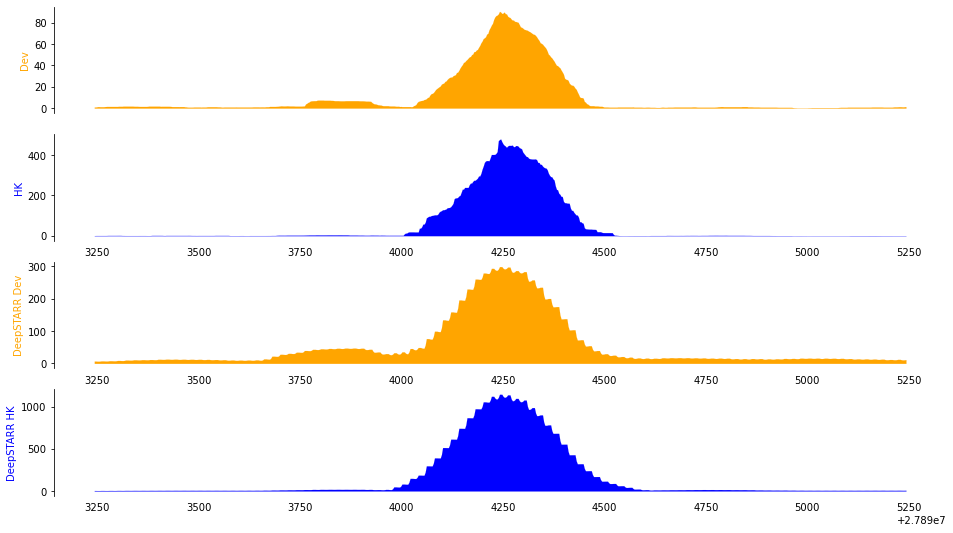

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(16, 9), sharex=True, sharey=False)
dev_config = dict(file="/cellar/users/aklie/data/datasets/deAlmeida_DrosophilaS2_UMI-STARR-seq/analysis/2023_12_11/geo/GSE183936_S2_dev_STARRseq_merged.bw", region=[(chrom, start, end)], color="orange")
dev_track = pygtk.BigWigTrack(dev_config)
dev_track.plot(ax[0], chrom, start, end)
ax[0].set_ylabel("Dev", color="orange")
ax[0].set_xlabel("")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[0].xticklabels = []

hk_config = dict(file="/cellar/users/aklie/data/datasets/deAlmeida_DrosophilaS2_UMI-STARR-seq/analysis/2023_12_11/geo/GSE183936_S2_hk_STARRseq_merged.bw", region=[(chrom, start, end)], color="blue")
hk_track = pygtk.BigWigTrack(hk_config)
hk_track.plot(ax[1], chrom, start, end)
ax[1].set_ylabel("HK", color="blue")
ax[1].set_xlabel("")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[1].xticklabels = []

dev_pred_config = dict(file="/cellar/users/aklie/data/datasets/deAlmeida_DrosophilaS2_UMI-STARR-seq/analysis/2023_12_11/starklab/DeepSTARR_dm3_sliding_window_prediction_dev.bw", region=[(chrom, start, end)], color="orange")
dev_pred_track = pygtk.BigWigTrack(dev_pred_config)
dev_pred_track.plot(ax[2], chrom, start, end)
ax[2].set_ylabel("DeepSTARR Dev", color="orange")
ax[2].set_xlabel("")
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[2].xticklabels = []

hk_pred_config = dict(file="/cellar/users/aklie/data/datasets/deAlmeida_DrosophilaS2_UMI-STARR-seq/analysis/2023_12_11/starklab/DeepSTARR_dm3_sliding_window_prediction_hk.bw", region=[(chrom, start, end)], color="blue")
hk_pred_track = pygtk.BigWigTrack(hk_pred_config)
hk_pred_track.plot(ax[3], chrom, start, end)
ax[3].set_ylabel("DeepSTARR HK", color="blue")
ax[3].set_xlabel("")
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[3].spines['bottom'].set_visible(False)
ax[3].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[3].xticklabels = []

In [ ]:
# Region to plot from paper
extension = 1000
chrom, start, end = 'chr2R', 13522605 - extension, 13575354 + extension

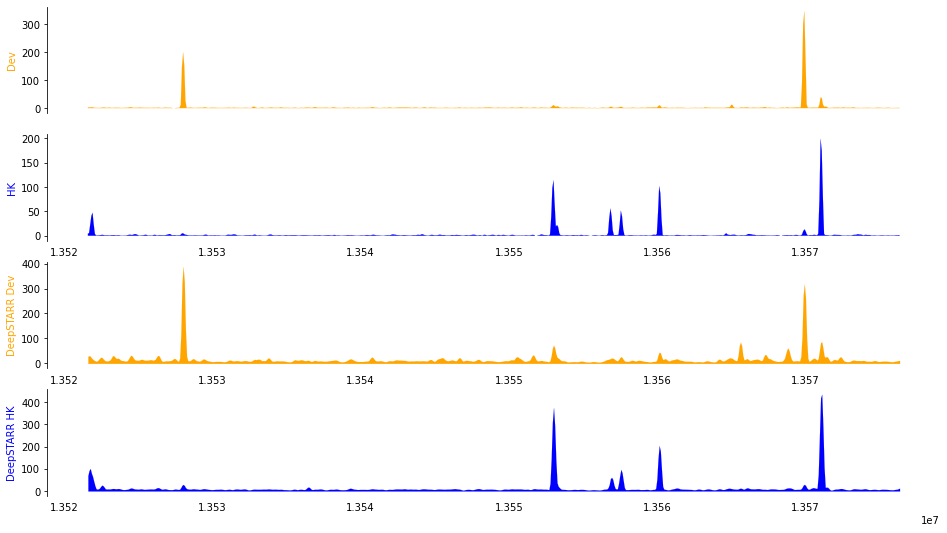

In [4]:
fig, ax = plt.subplots(4, 1, figsize=(16, 9), sharex=True, sharey=False)
dev_config = dict(file="/cellar/users/aklie/data/datasets/deAlmeida_DrosophilaS2_UMI-STARR-seq/analysis/2023_12_11/geo/GSE183936_S2_dev_STARRseq_merged.bw", region=[(chrom, start, end)], color="orange")
dev_track = pygtk.BigWigTrack(dev_config)
dev_track.plot(ax[0], chrom, start, end)
ax[0].set_ylabel("Dev", color="orange")
ax[0].set_xlabel("")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[0].xticklabels = []

hk_config = dict(file="/cellar/users/aklie/data/datasets/deAlmeida_DrosophilaS2_UMI-STARR-seq/analysis/2023_12_11/geo/GSE183936_S2_hk_STARRseq_merged.bw", region=[(chrom, start, end)], color="blue")
hk_track = pygtk.BigWigTrack(hk_config)
hk_track.plot(ax[1], chrom, start, end)
ax[1].set_ylabel("HK", color="blue")
ax[1].set_xlabel("")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[1].xticklabels = []

dev_pred_config = dict(file="/cellar/users/aklie/data/datasets/deAlmeida_DrosophilaS2_UMI-STARR-seq/analysis/2023_12_11/starklab/DeepSTARR_dm3_sliding_window_prediction_dev.bw", region=[(chrom, start, end)], color="orange")
dev_pred_track = pygtk.BigWigTrack(dev_pred_config)
dev_pred_track.plot(ax[2], chrom, start, end)
ax[2].set_ylabel("DeepSTARR Dev", color="orange")
ax[2].set_xlabel("")
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[2].xticklabels = []

hk_pred_config = dict(file="/cellar/users/aklie/data/datasets/deAlmeida_DrosophilaS2_UMI-STARR-seq/analysis/2023_12_11/starklab/DeepSTARR_dm3_sliding_window_prediction_hk.bw", region=[(chrom, start, end)], color="blue")
hk_pred_track = pygtk.BigWigTrack(hk_pred_config)
hk_pred_track.plot(ax[3], chrom, start, end)
ax[3].set_ylabel("DeepSTARR HK", color="blue")
ax[3].set_xlabel("")
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[3].spines['bottom'].set_visible(False)
ax[3].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[3].xticklabels = []

# DONE!

---